In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv("gold-prices.csv")

In [3]:
data

,Date,Price
0,1988-05,451.32
1,1988-06,451.66
2,1988-07,437.45
3,1988-10,406.39
4,1988-11,419.97
...,...,...
379,2019-02,1319.76
380,2019-03,1302.29
381,2019-07,1414.61
382,2019-08,1497.10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    384 non-null    object 
 1   Price   384 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [29]:
data['date_numeric'] = pd.to_datetime(data['Date']).astype(np.int64) // 10**9

In [31]:
X = data[['date_numeric']]
y = data['Price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
train_data = X_train.join(y_train)

In [19]:
train_data

,Date,Price
52,2001-12-01,275.99
169,1997-06-01,340.81
357,2012-12-01,1687.34
234,2014-08-01,1297.01
205,2007-02-01,665.10
...,...,...
303,1998-09-01,288.66
366,2016-01-01,1095.66
13,1990-10-01,381.33
290,1995-04-01,391.34


In [15]:
data['Date'] = pd.to_datetime(data['Date'])


<Axes: >

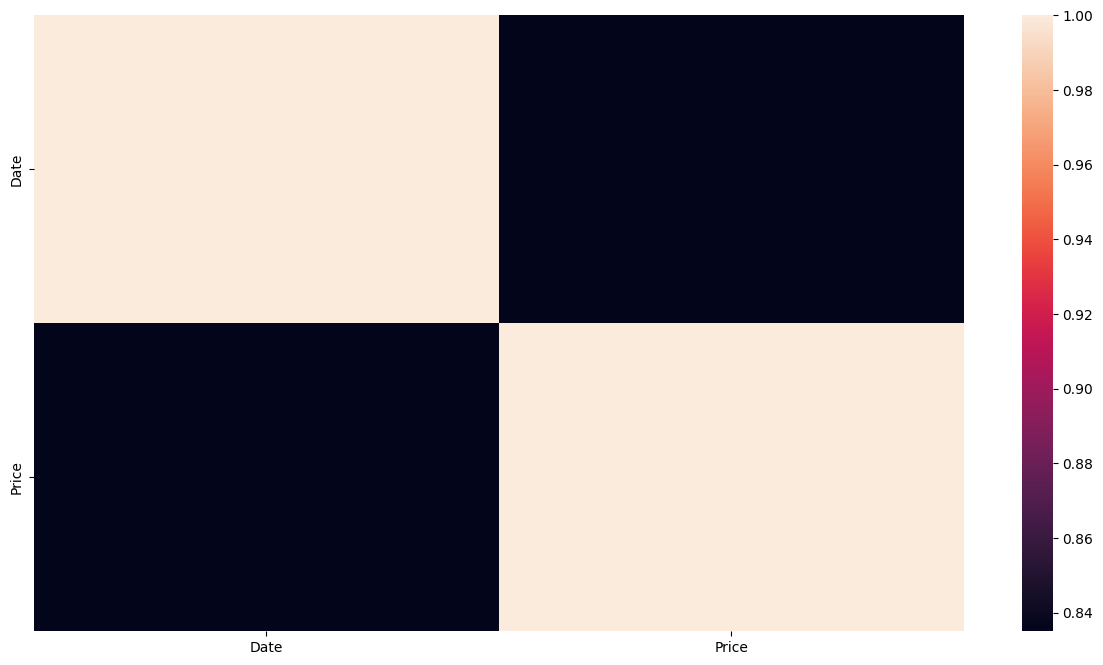

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr())

In [21]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [33]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = reg.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 62468.627788283535


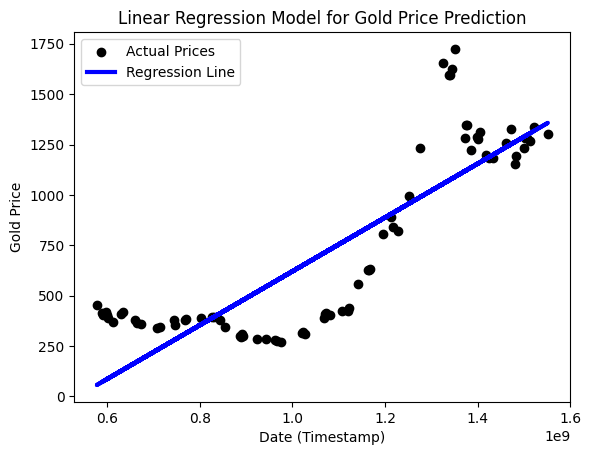

In [38]:
plt.scatter(X_test, y_test, color='black', label='Actual Prices')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Date (Timestamp)')
plt.ylabel('Gold Price')
plt.title('Linear Regression Model for Gold Price Prediction')
plt.legend()
plt.show()

In [47]:
user_input_date_str = input("Enter a date (YYYY-MM-DD): ")
user_input_date = pd.to_datetime(user_input_date_str)
user_input_date_numeric = user_input_date.timestamp()  # Convert to timestamp in seconds

# Reshape the input data to match the model's expectations
input_data = np.array([user_input_date_numeric]).reshape(-1, 1)

# Use the trained model to make predictions
predicted_price = reg.predict(input_data)

print(f"Predicted gold price for {user_input_date}: ${predicted_price[0]:.2f}")

Predicted gold price for 2024-11-23 00:00:00: $1599.22


C:\Users\Santhosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
